In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

    map = {
        'bart_simpson': 0,
        'charles_montgomery_burns': 1,
        'homer_simpson': 2,
        'krusty_the_clown': 3,
        'lisa_simpson': 4,
        'marge_simpson': 5,
        'milhouse_van_houten': 6,
        'moe_szyslak': 7,
        'ned_flanders': 8,
        'principal_skinner': 9,
    }


In [20]:
df = pd.read_csv("train.csv")
df = df[df["label"] != "label"]
df["label"] = df["label"].astype(int)
df.head()

/tmp/ipykernel_18488/2813267450.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,41,10,8,3,4,7,0,4,0,...,112,87,38,45,41,46,53,40,49,47
1,7,130,106,83,64,61,66,64,64,64,...,67,66,65,61,61,63,64,64,64,64
2,7,37,41,38,38,40,39,40,38,39,...,50,149,151,160,161,84,104,105,100,99
3,7,46,47,40,34,19,24,24,24,24,...,42,46,48,34,27,39,49,55,37,46
4,7,15,21,14,24,24,14,15,19,8,...,32,30,27,27,27,112,78,74,70,70


# Function Definition

In [21]:
def relu(Z):
	return np.maximum(0, Z)

def relu_derivative(Z):
	return Z > 0

def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
	m = y_true.shape[0]
	log_likelihood = -np.log(y_pred[range(m), y_true])
	loss = np.sum(log_likelihood) / m
	return loss

def one_hot(Y, C):
	Y = np.eye(C)[Y.reshape(-1)]
	return Y

# Network Model

In [22]:
class SimpleCNN:
	def __init__(self, input_size, hidden_size, output_size):
		self.W1 = np.random.randn(input_size, hidden_size) * 0.01
		self.b1 = np.zeros((1, hidden_size))
		self.W2 = np.random.randn(hidden_size, hidden_size) * 0.01
		self.b2 = np.zeros((1, hidden_size))
		self.W3 = np.random.randn(hidden_size, output_size) * 0.01
		self.b3 = np.zeros((1, output_size))
	
	def forward(self, X):
		self.Z1 = np.dot(X, self.W1) + self.b1
		self.A1 = relu(self.Z1)
		self.Z2 = np.dot(self.A1, self.W2) + self.b2
		self.A2 = relu(self.Z2)
		self.Z3 = np.dot(self.A2, self.W3) + self.b3
		self.A3 = softmax(self.Z3)
		return self.A3
	
	def backward(self, X, Y, learning_rate=0.01):
		m = Y.shape[0]
		Y = one_hot(Y, self.A3.shape[1])
		
		dZ3 = self.A3 - Y
		dW3 = (1/m) * np.dot(self.A2.T, dZ3)
		db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
		
		dA2 = np.dot(dZ3, self.W3.T)
		dZ2 = dA2 * relu_derivative(self.Z2)
		dW2 = (1/m) * np.dot(self.A1.T, dZ2)
		db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
		
		dA1 = np.dot(dZ2, self.W2.T)
		dZ1 = dA1 * relu_derivative(self.Z1)
		dW1 = (1/m) * np.dot(X.T, dZ1)
		db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
		
		# Update weights and biases
		self.W1 -= learning_rate * dW1
		self.b1 -= learning_rate * db1
		self.W2 -= learning_rate * dW2
		self.b2 -= learning_rate * db2
		self.W3 -= learning_rate * dW3
		self.b3 -= learning_rate * db3


In [23]:

# Assuming X is your input data and Y are your labels
# X = np.random.randn(number_of_samples, 784)  # Example input
X = df.drop("label", axis=1).values
# Y = np.array([0, 1, 2, ..., 9])  # Example labels (for 10 classes)
Y = np.array(df["label"].values)

# Example usage
learning_rate = 0.01
input_size = X.shape[1]
hidden_size = 100
output_size = 10
model = SimpleCNN(input_size, hidden_size, output_size)


# Forward pass
predictions = model.forward(X)

# Compute loss
loss = cross_entropy_loss(predictions, Y)

# Backward pass and update weights
model.backward(X, Y, learning_rate)

In [24]:
cost = []
epochs = 5000
learning_rate = 0.01
for i in range(epochs):
	print(f"{i}, {loss}, {learning_rate}")
	predictions = model.forward(X)
	loss = cross_entropy_loss(predictions, Y)
	cost.append(loss)
	model.backward(X, Y, learning_rate)

0, 2.328091174635199, 0.01
1, 2.304013423325181, 0.01
2, 2.300543258935054, 0.01
3, 2.2976444360551525, 0.01
4, 2.294804393251733, 0.01
5, 2.292182899129378, 0.01
6, 2.2897913364568256, 0.01
7, 2.2875113622825483, 0.01
8, 2.2852698747625704, 0.01
9, 2.283071901696999, 0.01
10, 2.280853825723949, 0.01
11, 2.2785532502766768, 0.01
12, 2.2761176301082515, 0.01
13, 2.2735386423068507, 0.01
14, 2.2708359644592284, 0.01
15, 2.267971839767388, 0.01
16, 2.2649733897709017, 0.01
17, 2.2618389766334435, 0.01
18, 2.2585626812701274, 0.01
19, 2.255146306320773, 0.01
20, 2.2515931171309314, 0.01
21, 2.2479059389001077, 0.01
22, 2.244089834480357, 0.01
23, 2.240129960351017, 0.01
24, 2.2360300264153747, 0.01
25, 2.2317971246372816, 0.01
26, 2.227458891446975, 0.01
27, 2.2232214276043822, 0.01
28, 2.2204587594265637, 0.01
29, 2.2300519494085824, 0.01
30, 2.333695478212729, 0.01
31, 2.4488627378792622, 0.01
32, 2.281827464025979, 0.01
33, 2.2645567050698463, 0.01
34, 2.254724362349192, 0.01
35, 2.2460

KeyboardInterrupt: 

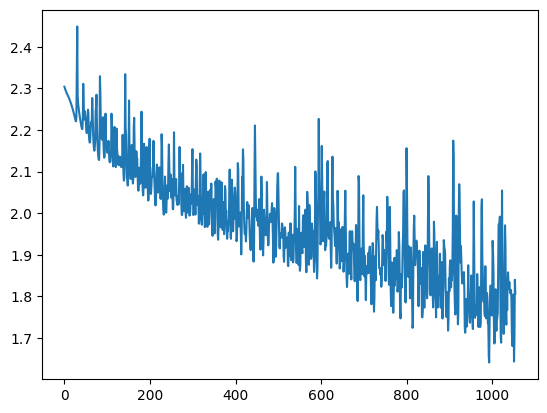

In [25]:
plt.plot( np.linspace(0, len(cost), len(cost)), np.array(cost))

In [47]:
epochs = 3000
learning_rate = 0.0001
for i in range(epochs):
	print(f"{i}, {loss}, {learning_rate}")
	#if i%300 == 0:
	#	learning_rate *= 0.5
	predictions = model.forward(X)
	loss = cross_entropy_loss(predictions, Y)
	cost.append(loss)
	model.backward(X, Y, learning_rate)
	idk = cost[0] - cost[i]

0, 0.3593996637571558, 0.0001
1, 0.3593996637571558, 0.0001
2, 0.35559076221396346, 0.0001
3, 0.35412990684769985, 0.0001
4, 0.3535436718437196, 0.0001
5, 0.35330662705853694, 0.0001
6, 0.35319835404997096, 0.0001
7, 0.35314377349087, 0.0001
8, 0.3531108031958376, 0.0001
9, 0.353086396562798, 0.0001
10, 0.35306545951684404, 0.0001
11, 0.3530460398675548, 0.0001
12, 0.3530279212387114, 0.0001
13, 0.3530107185256285, 0.0001
14, 0.35299399137271076, 0.0001
15, 0.3529780926103192, 0.0001
16, 0.35296254065344523, 0.0001
17, 0.3529471836734599, 0.0001
18, 0.35293203817546687, 0.0001
19, 0.3529170128335513, 0.0001
20, 0.3529020744692236, 0.0001
21, 0.3528872622272852, 0.0001
22, 0.35287254913864907, 0.0001
23, 0.35285792264812316, 0.0001
24, 0.35284337481126965, 0.0001
25, 0.35282881230618884, 0.0001
26, 0.35281428842961515, 0.0001
27, 0.3527997994646531, 0.0001
28, 0.3527853725608883, 0.0001
29, 0.352770961800619, 0.0001
30, 0.3527565712923315, 0.0001
31, 0.35274218251865647, 0.0001
32, 0.35

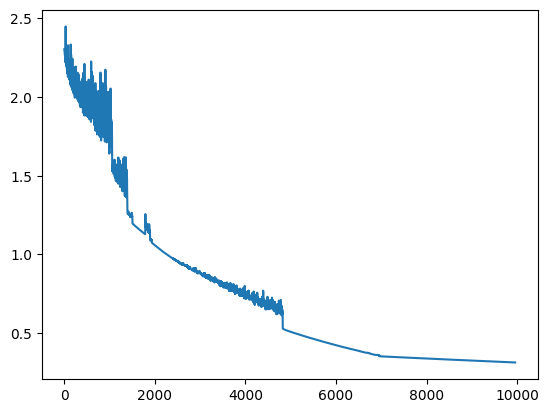

In [48]:
plt.plot( np.linspace(0, len(cost), len(cost)), np.array(cost))

In [49]:
print(cost[0], cost[-1])

2.304013423325181 0.3138245540713956


In [50]:
print(min(cost))

0.3138245540713956


# Testing

In [51]:
df_test = pd.read_csv("test.csv")
df_test = df[df["label"] != "label"]
df_test["label"] = df["label"].astype(int)
df_test.head()

/tmp/ipykernel_18488/3691834882.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("test.csv")


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,41,10,8,3,4,7,0,4,0,...,112,87,38,45,41,46,53,40,49,47
1,7,130,106,83,64,61,66,64,64,64,...,67,66,65,61,61,63,64,64,64,64
2,7,37,41,38,38,40,39,40,38,39,...,50,149,151,160,161,84,104,105,100,99
3,7,46,47,40,34,19,24,24,24,24,...,42,46,48,34,27,39,49,55,37,46
4,7,15,21,14,24,24,14,15,19,8,...,32,30,27,27,27,112,78,74,70,70


In [52]:
def predict(model, X):
	"""Make predictions with the model."""
	logits = model.forward(X)
	return softmax(logits)

def test_model(model, X_test, y_test):
	"""Test the model on the test dataset and return the accuracy."""
	predictions = predict(model, X_test)
	predicted_classes = np.argmax(predictions, axis=1)
	actual_classes = np.argmax(y_test, axis=1)
	accuracy = np.mean(predicted_classes == actual_classes)
	return accuracy

# Example usage:
# Assuming model is your trained SimpleCNN model
#X_test = np.random.randn(num_test_samples, 784)  # Example test input
X_test = df_test.drop("label", axis=1).values
#y_test = np.eye(10)[np.random.choice(10, num_test_samples)]  # Example test labels (one-hot encoded)
Y_test = np.eye(10)[np.array(df_test["label"].values)]

accuracy = test_model(model, X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.42%


In [53]:
with open("values3.txt", "wb") as file:
        file.write(model.W1.tostring())
        file.write(model.W2.tostring())
        file.write(model.W3.tostring())
        file.write(model.b1.tostring())
        file.write(model.b2.tostring())
        file.write(model.b3.tostring())

/tmp/ipykernel_18488/4234113884.py:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.W1.tostring())
/tmp/ipykernel_18488/4234113884.py:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.W2.tostring())
/tmp/ipykernel_18488/4234113884.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.W3.tostring())
/tmp/ipykernel_18488/4234113884.py:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.b1.tostring())
/tmp/ipykernel_18488/4234113884.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.b2.tostring())
/tmp/ipykernel_18488/4234113884.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  file.write(model.b3.tostring())
